## Problem Statement

The task is to predict the volume of passengers in trains.

We are divided analysis in following steps:-<br>
    1-Data understanding and cleaning<br>
    2-Data preparation for model building<br>
    3-Building Random Forest model <br>
    4- Prediction on Test Set <br>
    5-Evluation and Conclusion
    


In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# libraries
import pandas as pd
import numpy as np

# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.metrics import classification_report
import os

C:\Users\nidhi\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


## Data Understanding and Data Cleaning 

In [3]:
#import data set

df= pd.read_csv("C:/Users/nidhi/Desktop/Hitachi_Hackathon/DataSet/Train.csv", parse_dates=['current_date', 'current_time'])
df.head()

,id_code,current_date,current_time,source_name,destination_name,train_name,target,country_code_source,longitude_source,latitude_source,mean_halt_times_source,country_code_destination,longitude_destination,latitude_destination,mean_halt_times_destination,current_year,current_week,current_day,is_weekend
0,isfywypmkqqhyft,2016-07-27,2019-11-10 20:05:51,station$147,station$1,ICZVZS,high,whber,4.356801,50.845658,634.16474,NaN,NaN,NaN,NaN,2016,30,Wednesday,False
1,mqsfxyvuqpbwomk,2016-07-27,2019-11-10 20:06:11,station$147,station$1,ICZVZS,high,whber,4.356801,50.845658,634.16474,NaN,NaN,NaN,NaN,2016,30,Wednesday,False
2,alspwwtbdvqsgby,2016-07-27,2019-11-10 20:08:57,station$147,station$1,ICZVZS,high,whber,4.356801,50.845658,634.16474,NaN,NaN,NaN,NaN,2016,30,Wednesday,False
3,szitxhhqduyrqpg,2016-07-27,2019-11-10 20:09:08,station$147,station$1,ICZVZS,high,whber,4.356801,50.845658,634.16474,NaN,NaN,NaN,NaN,2016,30,Wednesday,False
4,krisdqzczivvwcp,2016-07-27,2019-11-10 20:11:01,station$147,station$1,ICZVZS,high,whber,4.356801,50.845658,634.16474,NaN,NaN,NaN,NaN,2016,30,Wednesday,False


In [4]:
test_df= pd.read_csv("C:/Users/nidhi/Desktop/Hitachi_Hackathon/DataSet/Test.csv", parse_dates=['current_date', 'current_time']) 
test_df.head()

,id_code,current_date,current_time,source_name,destination_name,train_name,country_code_source,longitude_source,latitude_source,mean_halt_times_source,country_code_destination,longitude_destination,latitude_destination,mean_halt_times_destination,current_year,current_week,current_day,is_weekend
0,mckbezdplrukagl,2016-10-06,2019-11-10 01:05:38,station$143,station$142,SZAYASZ,whber,4.243393,50.866728,39.121387,whber,4.273543,50.868337,39.121387,2016,40,Thursday,False
1,agxwrnbmzbyxsjg,2016-10-06,2019-11-10 01:05:56,station$133,station$147,ICXYXY,whber,4.326220,50.880833,95.676301,whber,4.356801,50.845658,634.164740,2016,40,Thursday,False
2,iqjojyewdyfshtj,2016-10-06,2019-11-10 06:11:54,station$632,station$544,ICWAT,whber,3.264549,50.824506,153.115607,whber,3.710675,51.035896,309.014451,2016,40,Thursday,False
3,hssqexnzirioaag,2016-10-06,2019-11-10 07:00:00,station$296,station$281,ICWYR,whber,5.599695,50.613152,87.130058,whber,5.566695,50.624550,269.124277,2016,40,Thursday,False
4,lublknpfraiznhr,2016-10-06,2019-11-10 07:00:09,station$281,station$266,ICWYR,whber,5.566695,50.624550,269.124277,whber,4.715866,50.882280,351.916185,2016,40,Thursday,False


In [5]:
# summary of the dataset:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1284 entries, 0 to 1283
Data columns (total 19 columns):
id_code                        1284 non-null object
current_date                   1284 non-null datetime64[ns]
current_time                   1284 non-null datetime64[ns]
source_name                    1284 non-null object
destination_name               1284 non-null object
train_name                     1284 non-null object
target                         1284 non-null object
country_code_source            1283 non-null object
longitude_source               1283 non-null float64
latitude_source                1283 non-null float64
mean_halt_times_source         1283 non-null float64
country_code_destination       1251 non-null object
longitude_destination          1251 non-null float64
latitude_destination           1251 non-null float64
mean_halt_times_destination    1251 non-null float64
current_year                   1284 non-null int64
current_week                   1284 non-

In [6]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 964 entries, 0 to 963
Data columns (total 18 columns):
id_code                        964 non-null object
current_date                   964 non-null datetime64[ns]
current_time                   964 non-null datetime64[ns]
source_name                    964 non-null object
destination_name               964 non-null object
train_name                     964 non-null object
country_code_source            964 non-null object
longitude_source               964 non-null float64
latitude_source                964 non-null float64
mean_halt_times_source         964 non-null float64
country_code_destination       964 non-null object
longitude_destination          964 non-null float64
latitude_destination           964 non-null float64
mean_halt_times_destination    964 non-null float64
current_year                   964 non-null int64
current_week                   964 non-null int64
current_day                    964 non-null object
is_weeke

In [7]:
# Inspect the  of the dataset
print(df.shape)
print(df.columns)



(1284, 19)
Index(['id_code', 'current_date', 'current_time', 'source_name',
       'destination_name', 'train_name', 'target', 'country_code_source',
       'longitude_source', 'latitude_source', 'mean_halt_times_source',
       'country_code_destination', 'longitude_destination',
       'latitude_destination', 'mean_halt_times_destination', 'current_year',
       'current_week', 'current_day', 'is_weekend'],
      dtype='object')


In [8]:
# Inspect the  of the dataset
print(test_df.shape)
print(test_df.columns)

(964, 18)
Index(['id_code', 'current_date', 'current_time', 'source_name',
       'destination_name', 'train_name', 'country_code_source',
       'longitude_source', 'latitude_source', 'mean_halt_times_source',
       'country_code_destination', 'longitude_destination',
       'latitude_destination', 'mean_halt_times_destination', 'current_year',
       'current_week', 'current_day', 'is_weekend'],
      dtype='object')


In [9]:
df.describe(percentiles=[.25,.5,.75,.9,.95])

,longitude_source,latitude_source,mean_halt_times_source,longitude_destination,latitude_destination,mean_halt_times_destination,current_year,current_week
count,1283.000000,1283.000000,1283.000000,1251.000000,1251.000000,1251.000000,1284.0,1284.000000
mean,4.292481,50.934674,278.061613,4.298829,50.924570,271.872701,2016.0,36.781153
std,0.552492,0.206194,228.954089,0.558849,0.296266,234.419223,0.0,3.175253
min,-0.126061,49.638463,0.000000,0.321070,43.455128,0.000000,2016.0,30.000000
25%,4.039653,50.845658,78.488439,4.014573,50.835707,71.193642,2016.0,36.000000
50%,4.360846,50.896456,180.598266,4.356801,50.891925,164.419075,2016.0,38.000000
75%,4.482785,51.056365,467.982659,4.482785,51.035896,421.644509,2016.0,39.000000
90%,4.886915,51.199230,640.265896,4.893089,51.197828,640.265896,2016.0,39.000000
95%,5.327627,51.217200,686.615607,5.329900,51.217200,686.615607,2016.0,40.000000
max,5.982265,51.925093,686.615607,6.958823,52.379128,686.615607,2016.0,40.000000


In [10]:
test_df.describe(percentiles=[.25,.5,.75,.9,.95])

,longitude_source,latitude_source,mean_halt_times_source,longitude_destination,latitude_destination,mean_halt_times_destination,current_year,current_week
count,964.000000,964.000000,964.000000,964.000000,964.000000,964.000000,964.0,964.000000
mean,4.281109,50.889685,271.768393,4.277023,50.889969,287.419240,2016.0,41.509336
std,0.578196,0.202678,222.607397,0.572235,0.240117,238.876318,0.0,0.987416
min,2.652770,49.599996,11.973988,2.355309,48.880998,10.283237,2016.0,40.000000
25%,3.841955,50.824506,72.329480,3.942542,50.835707,72.329480,2016.0,41.000000
50%,4.356801,50.882280,202.187861,4.356801,50.859663,180.598266,2016.0,41.000000
75%,4.499323,51.035896,351.916185,4.482785,51.017648,467.982659,2016.0,42.000000
90%,4.862220,51.181513,640.265896,4.925810,51.197226,640.265896,2016.0,43.000000
95%,5.507901,51.199230,686.615607,5.327627,51.199230,686.615607,2016.0,43.000000
max,6.133331,51.925093,686.615607,6.133331,52.379128,686.615607,2016.0,43.000000


In [11]:
print(df.columns)

Index(['id_code', 'current_date', 'current_time', 'source_name',
       'destination_name', 'train_name', 'target', 'country_code_source',
       'longitude_source', 'latitude_source', 'mean_halt_times_source',
       'country_code_destination', 'longitude_destination',
       'latitude_destination', 'mean_halt_times_destination', 'current_year',
       'current_week', 'current_day', 'is_weekend'],
      dtype='object')


In [12]:
#checking dublicate values

df[df.duplicated(keep=False)]

,id_code,current_date,current_time,source_name,destination_name,train_name,target,country_code_source,longitude_source,latitude_source,mean_halt_times_source,country_code_destination,longitude_destination,latitude_destination,mean_halt_times_destination,current_year,current_week,current_day,is_weekend


In [13]:
#checking dublicate values

test_df[test_df.duplicated(keep=False)]

,id_code,current_date,current_time,source_name,destination_name,train_name,country_code_source,longitude_source,latitude_source,mean_halt_times_source,country_code_destination,longitude_destination,latitude_destination,mean_halt_times_destination,current_year,current_week,current_day,is_weekend


No Duplicates !!!

In [14]:
#checking null values

print(df.isnull().values.any())
print(df.isnull().values.sum())
print(df.isnull().sum()*100/df.shape[0])

True
136
id_code                        0.000000
current_date                   0.000000
current_time                   0.000000
source_name                    0.000000
destination_name               0.000000
train_name                     0.000000
target                         0.000000
country_code_source            0.077882
longitude_source               0.077882
latitude_source                0.077882
mean_halt_times_source         0.077882
country_code_destination       2.570093
longitude_destination          2.570093
latitude_destination           2.570093
mean_halt_times_destination    2.570093
current_year                   0.000000
current_week                   0.000000
current_day                    0.000000
is_weekend                     0.000000
dtype: float64


####  Null Values are there ! 

In [15]:
#checking null values

print(test_df.isnull().values.any())
print(test_df.isnull().values.sum())
print(test_df.isnull().sum()*100/test_df.shape[0])

False
0
id_code                        0.0
current_date                   0.0
current_time                   0.0
source_name                    0.0
destination_name               0.0
train_name                     0.0
country_code_source            0.0
longitude_source               0.0
latitude_source                0.0
mean_halt_times_source         0.0
country_code_destination       0.0
longitude_destination          0.0
latitude_destination           0.0
mean_halt_times_destination    0.0
current_year                   0.0
current_week                   0.0
current_day                    0.0
is_weekend                     0.0
dtype: float64


NO NULLS in Test file !!!

### EDA

In [16]:
# subset all categorical variables

df_categorical = df.select_dtypes(include=['object'])
df_categorical.head()


,id_code,source_name,destination_name,train_name,target,country_code_source,country_code_destination,current_day
0,isfywypmkqqhyft,station$147,station$1,ICZVZS,high,whber,NaN,Wednesday
1,mqsfxyvuqpbwomk,station$147,station$1,ICZVZS,high,whber,NaN,Wednesday
2,alspwwtbdvqsgby,station$147,station$1,ICZVZS,high,whber,NaN,Wednesday
3,szitxhhqduyrqpg,station$147,station$1,ICZVZS,high,whber,NaN,Wednesday
4,krisdqzczivvwcp,station$147,station$1,ICZVZS,high,whber,NaN,Wednesday


In [17]:
# subset all numerical variables

df_numerical = df.select_dtypes(include=['float64', 'int64'])
df_numerical.head()


,longitude_source,latitude_source,mean_halt_times_source,longitude_destination,latitude_destination,mean_halt_times_destination,current_year,current_week
0,4.356801,50.845658,634.16474,NaN,NaN,NaN,2016,30
1,4.356801,50.845658,634.16474,NaN,NaN,NaN,2016,30
2,4.356801,50.845658,634.16474,NaN,NaN,NaN,2016,30
3,4.356801,50.845658,634.16474,NaN,NaN,NaN,2016,30
4,4.356801,50.845658,634.16474,NaN,NaN,NaN,2016,30


In [18]:
df["current_date"]= pd.to_datetime(df["current_date"]) 

df["current_time"]= pd.to_datetime(df["current_time"])



In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1284 entries, 0 to 1283
Data columns (total 19 columns):
id_code                        1284 non-null object
current_date                   1284 non-null datetime64[ns]
current_time                   1284 non-null datetime64[ns]
source_name                    1284 non-null object
destination_name               1284 non-null object
train_name                     1284 non-null object
target                         1284 non-null object
country_code_source            1283 non-null object
longitude_source               1283 non-null float64
latitude_source                1283 non-null float64
mean_halt_times_source         1283 non-null float64
country_code_destination       1251 non-null object
longitude_destination          1251 non-null float64
latitude_destination           1251 non-null float64
mean_halt_times_destination    1251 non-null float64
current_year                   1284 non-null int64
current_week                   1284 non-

In [20]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 964 entries, 0 to 963
Data columns (total 18 columns):
id_code                        964 non-null object
current_date                   964 non-null datetime64[ns]
current_time                   964 non-null datetime64[ns]
source_name                    964 non-null object
destination_name               964 non-null object
train_name                     964 non-null object
country_code_source            964 non-null object
longitude_source               964 non-null float64
latitude_source                964 non-null float64
mean_halt_times_source         964 non-null float64
country_code_destination       964 non-null object
longitude_destination          964 non-null float64
latitude_destination           964 non-null float64
mean_halt_times_destination    964 non-null float64
current_year                   964 non-null int64
current_week                   964 non-null int64
current_day                    964 non-null object
is_weeke

In [21]:
# extracting month and year from current_date

df['month'] = df['current_date'].apply(lambda x: x.month)
df['date'] = df['current_date'].apply(lambda x: x.day)

In [22]:
# extracting month and year from current_date

test_df['month'] = test_df['current_date'].apply(lambda x: x.month)
test_df['date'] = test_df['current_date'].apply(lambda x: x.day)

In [23]:
df['month'] = df['month'].astype('object')
df['date'] = df['date'].astype('object')

In [24]:
test_df['month'] = test_df['month'].astype('object')
test_df['date'] = test_df['date'].astype('object')

In [25]:
df.columns

Index(['id_code', 'current_date', 'current_time', 'source_name',
       'destination_name', 'train_name', 'target', 'country_code_source',
       'longitude_source', 'latitude_source', 'mean_halt_times_source',
       'country_code_destination', 'longitude_destination',
       'latitude_destination', 'mean_halt_times_destination', 'current_year',
       'current_week', 'current_day', 'is_weekend', 'month', 'date'],
      dtype='object')

In [26]:
df.head()

,id_code,current_date,current_time,source_name,destination_name,train_name,target,country_code_source,longitude_source,latitude_source,...,country_code_destination,longitude_destination,latitude_destination,mean_halt_times_destination,current_year,current_week,current_day,is_weekend,month,date
0,isfywypmkqqhyft,2016-07-27,2019-11-10 20:05:51,station$147,station$1,ICZVZS,high,whber,4.356801,50.845658,...,NaN,NaN,NaN,NaN,2016,30,Wednesday,False,7,27
1,mqsfxyvuqpbwomk,2016-07-27,2019-11-10 20:06:11,station$147,station$1,ICZVZS,high,whber,4.356801,50.845658,...,NaN,NaN,NaN,NaN,2016,30,Wednesday,False,7,27
2,alspwwtbdvqsgby,2016-07-27,2019-11-10 20:08:57,station$147,station$1,ICZVZS,high,whber,4.356801,50.845658,...,NaN,NaN,NaN,NaN,2016,30,Wednesday,False,7,27
3,szitxhhqduyrqpg,2016-07-27,2019-11-10 20:09:08,station$147,station$1,ICZVZS,high,whber,4.356801,50.845658,...,NaN,NaN,NaN,NaN,2016,30,Wednesday,False,7,27
4,krisdqzczivvwcp,2016-07-27,2019-11-10 20:11:01,station$147,station$1,ICZVZS,high,whber,4.356801,50.845658,...,NaN,NaN,NaN,NaN,2016,30,Wednesday,False,7,27


### Removing NaNs from 'country_code_source' column

In [27]:
df = df[~pd.isnull(df['country_code_source'])]
df = df[~pd.isnull(df['country_code_destination'])]
#df = df[~pd.isnull(df['country_code_source'])]


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1250 entries, 31 to 1283
Data columns (total 21 columns):
id_code                        1250 non-null object
current_date                   1250 non-null datetime64[ns]
current_time                   1250 non-null datetime64[ns]
source_name                    1250 non-null object
destination_name               1250 non-null object
train_name                     1250 non-null object
target                         1250 non-null object
country_code_source            1250 non-null object
longitude_source               1250 non-null float64
latitude_source                1250 non-null float64
mean_halt_times_source         1250 non-null float64
country_code_destination       1250 non-null object
longitude_destination          1250 non-null float64
latitude_destination           1250 non-null float64
mean_halt_times_destination    1250 non-null float64
current_year                   1250 non-null int64
current_week                   1250 non

### No Nulls !!! We are good to go !!!

In [29]:
df.shape

(1250, 21)

In [30]:
test_df.shape

(964, 20)

#### Checking the value_counts category wise 

In [31]:
ct1= pd.crosstab(df['month'],df['target'])
ct1

target,high,low,medium
month,,,
7,12,47,14
8,15,130,47
9,302,286,239
10,47,68,43


In [32]:
df.month.value_counts()

9     827
8     192
10    158
7      73
Name: month, dtype: int64

In [33]:
ct2= pd.crosstab(df['country_code_source'],df['target'])
ct2

target,high,low,medium
country_code_source,,,
logbp,0,0,1
qwnll,0,0,1
whber,376,530,341
wsluu,0,1,0


In [34]:
df.country_code_source.value_counts()

whber    1247
qwnll       1
wsluu       1
logbp       1
Name: country_code_source, dtype: int64

In [35]:
ct3= pd.crosstab(df['country_code_destination'],df['target'])
ct3

target,high,low,medium
country_code_destination,,,
aqfre,0,0,1
logbp,0,0,1
qwnll,0,0,1
whber,376,530,340
zxdec,0,1,0


In [36]:
df.country_code_destination.value_counts()

whber    1246
logbp       1
qwnll       1
zxdec       1
aqfre       1
Name: country_code_destination, dtype: int64

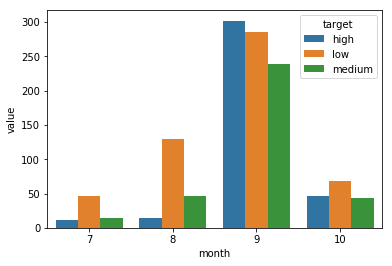

In [37]:
stacked = ct1.stack().reset_index().rename(columns={0:'value'})
sns.barplot(x=stacked.month, y=stacked.value, hue=stacked.target)

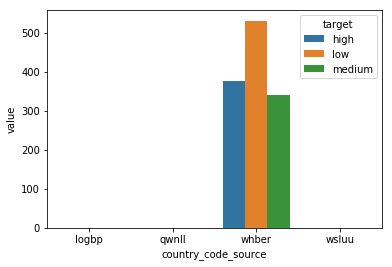

In [38]:
stacked = ct2.stack().reset_index().rename(columns={0:'value'})
sns.barplot(x=stacked.country_code_source, y=stacked.value, hue=stacked.target)

### Its evident that the distribution is almost Nill for all the other countries except 'whber'

Dropping the Columns which are not Significant for Analysis.

In [39]:
df= df.drop(['country_code_source', 'country_code_destination', 'id_code'], axis=1)

In [40]:
test_df= test_df.drop(['country_code_source', 'country_code_destination', 'id_code'], axis=1)

In [41]:
df.head()

,current_date,current_time,source_name,destination_name,train_name,target,longitude_source,latitude_source,mean_halt_times_source,longitude_destination,latitude_destination,mean_halt_times_destination,current_year,current_week,current_day,is_weekend,month,date
31,2016-07-27,2019-11-10 23:41:46,station$130,station$214,ICWVYA,high,4.360846,50.859663,640.265896,4.482785,51.017648,306.523121,2016,30,Wednesday,False,7,27
32,2016-07-28,2019-11-10 00:04:25,station$248,station$248,ICZVXY,low,5.497685,50.967057,39.476879,5.497685,50.967057,39.476879,2016,30,Thursday,False,7,28
34,2016-07-28,2019-11-10 00:18:09,station$248,station$147,ICZVXY,low,5.497685,50.967057,39.476879,4.356801,50.845658,634.164740,2016,30,Thursday,False,7,28
35,2016-07-28,2019-11-10 00:38:28,station$177,station$130,ICXUYS,high,4.482076,50.896456,171.020231,4.360846,50.859663,640.265896,2016,30,Thursday,False,7,28
36,2016-07-28,2019-11-10 08:50:27,station$544,station$147,ICZVAT,medium,3.710675,51.035896,309.014451,4.356801,50.845658,634.164740,2016,30,Thursday,False,7,28


In [42]:
# Plotting all the numerical values

#sns.pairplot(df)
#plt.show()

Data is Non linear !

In [43]:
df1=df_numerical
#df1.head()
df2= df1.drop(['current_year'], axis=1)

In [44]:
# correlation matrix
cor = df2.corr()
cor

,longitude_source,latitude_source,mean_halt_times_source,longitude_destination,latitude_destination,mean_halt_times_destination,current_week
longitude_source,1.000000,-0.276901,0.074723,0.682464,-0.117363,0.042066,0.039920
latitude_source,-0.276901,1.000000,-0.070982,-0.200708,0.479730,-0.014569,-0.176671
mean_halt_times_source,0.074723,-0.070982,1.000000,0.109131,-0.093509,0.092819,-0.102409
longitude_destination,0.682464,-0.200708,0.109131,1.000000,-0.202124,0.047335,0.014612
latitude_destination,-0.117363,0.479730,-0.093509,-0.202124,1.000000,-0.032823,-0.102989
mean_halt_times_destination,0.042066,-0.014569,0.092819,0.047335,-0.032823,1.000000,0.018640
current_week,0.039920,-0.176671,-0.102409,0.014612,-0.102989,0.018640,1.000000


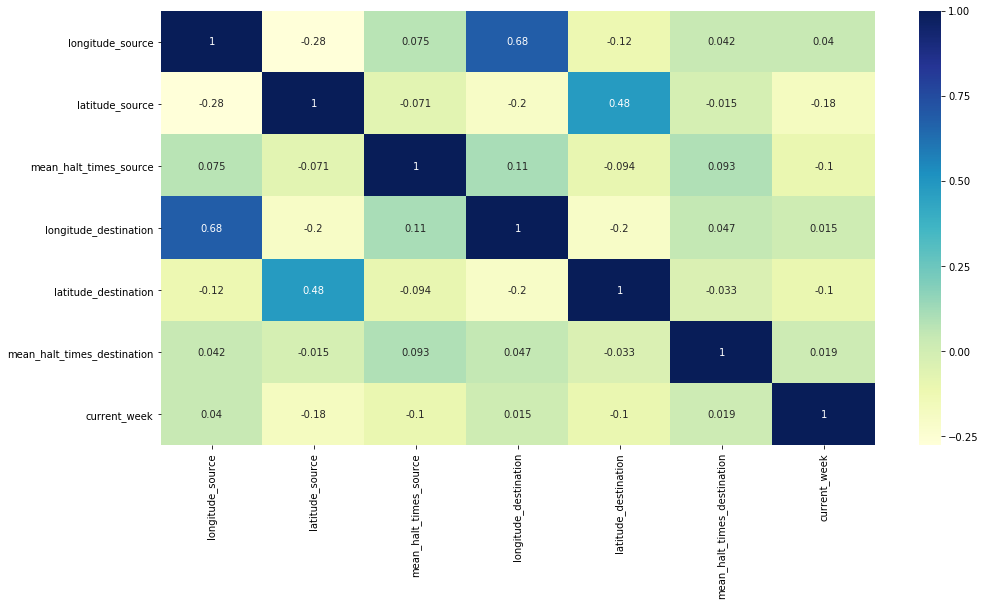

In [45]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(16,8))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

Its evident that 'lattitude and longitude of source is highly correlated with destination'!!!

#### Converting datetime to Int so that its suitable for scaling !!!

In [46]:
df["current_date"]= pd.to_datetime(df["current_date"]).astype('int64') 

df["current_time"]= pd.to_datetime(df["current_time"]).astype('int64')

In [47]:
test_df["current_date"]= pd.to_datetime(test_df["current_date"]).astype('int64')

test_df["current_time"]= pd.to_datetime(test_df["current_time"]).astype('int64')

#### Converting 'is_weekend' to object from boolean

In [48]:
df['is_weekend'] = df['is_weekend'].astype('object')

In [49]:
test_df['is_weekend'] = test_df['is_weekend'].astype('object')

#### For Categorical variables  applying Label Encoding 

In [50]:

# Instantiate LabelEncoder


from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Iterate over all the values of each column and extract their dtypes
for col in df.columns:
    # Compare if the dtype is object
    if df[col].dtype=='object':
    # Use LabelEncoder to do the numeric transformation
        df[col]=le.fit_transform(df[col])

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1250 entries, 31 to 1283
Data columns (total 18 columns):
current_date                   1250 non-null int64
current_time                   1250 non-null int64
source_name                    1250 non-null int64
destination_name               1250 non-null int64
train_name                     1250 non-null int64
target                         1250 non-null int64
longitude_source               1250 non-null float64
latitude_source                1250 non-null float64
mean_halt_times_source         1250 non-null float64
longitude_destination          1250 non-null float64
latitude_destination           1250 non-null float64
mean_halt_times_destination    1250 non-null float64
current_year                   1250 non-null int64
current_week                   1250 non-null int64
current_day                    1250 non-null int64
is_weekend                     1250 non-null int64
month                          1250 non-null int64
date         

In [52]:

# Instantiate LabelEncoder

le = LabelEncoder()

# Iterate over all the values of each column and extract their dtypes
for col in test_df.columns:
    # Compare if the dtype is object
    if test_df[col].dtype=='object':
    # Use LabelEncoder to do the numeric transformation
        test_df[col]=le.fit_transform(test_df[col])

In [53]:
df.head()

,current_date,current_time,source_name,destination_name,train_name,target,longitude_source,latitude_source,mean_halt_times_source,longitude_destination,latitude_destination,mean_halt_times_destination,current_year,current_week,current_day,is_weekend,month,date
31,1469577600000000000,1573429306000000000,13,65,72,0,4.360846,50.859663,640.265896,4.482785,51.017648,306.523121,2016,30,6,0,0,25
32,1469664000000000000,1573344265000000000,68,82,336,1,5.497685,50.967057,39.476879,5.497685,50.967057,39.476879,2016,30,4,0,0,26
34,1469664000000000000,1573345089000000000,68,28,336,1,5.497685,50.967057,39.476879,4.356801,50.845658,634.164740,2016,30,4,0,0,26
35,1469664000000000000,1573346308000000000,37,15,146,0,4.482076,50.896456,171.020231,4.360846,50.859663,640.265896,2016,30,4,0,0,26
36,1469664000000000000,1573375827000000000,144,28,324,2,3.710675,51.035896,309.014451,4.356801,50.845658,634.164740,2016,30,4,0,0,26


In [54]:
test_df.head()

,current_date,current_time,source_name,destination_name,train_name,longitude_source,latitude_source,mean_halt_times_source,longitude_destination,latitude_destination,mean_halt_times_destination,current_year,current_week,current_day,is_weekend,month,date
0,1475712000000000000,1573347938000000000,21,20,471,4.243393,50.866728,39.121387,4.273543,50.868337,39.121387,2016,40,4,0,0,0
1,1475712000000000000,1573347956000000000,17,21,171,4.326220,50.880833,95.676301,4.356801,50.845658,634.164740,2016,40,4,0,0,0
2,1475712000000000000,1573366314000000000,156,127,64,3.264549,50.824506,153.115607,3.710675,51.035896,309.014451,2016,40,4,0,0,0
3,1475712000000000000,1573369200000000000,83,70,83,5.599695,50.613152,87.130058,5.566695,50.624550,269.124277,2016,40,4,0,0,0
4,1475712000000000000,1573369209000000000,79,63,83,5.566695,50.624550,269.124277,4.715866,50.882280,351.916185,2016,40,4,0,0,0


<function matplotlib.pyplot.show(*args, **kw)>

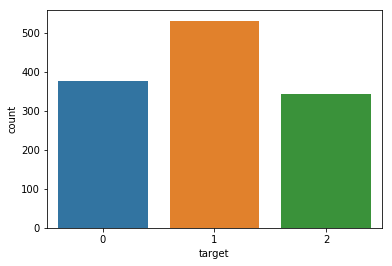

In [55]:
label = df.target
#plot count plot

sns.countplot(label)
plt.show

#### There is No Class Imbalance !!! We are good to go !

In [56]:
#df_1=df
#df_1['target']= df['target']
#df= df.drop(['target'], 1)

In [57]:
df.shape

(1250, 18)

In [58]:
test_df.shape

(964, 17)

In [59]:
test_df.columns

Index(['current_date', 'current_time', 'source_name', 'destination_name',
       'train_name', 'longitude_source', 'latitude_source',
       'mean_halt_times_source', 'longitude_destination',
       'latitude_destination', 'mean_halt_times_destination', 'current_year',
       'current_week', 'current_day', 'is_weekend', 'month', 'date'],
      dtype='object')

## Data Preparation for Model Building

In [60]:
# Putting feature variable to X
X = df.drop('target',axis=1)

# Putting response variable to y
y = df['target']

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [61]:
# Running the random forest with default parameters

rfc = RandomForestClassifier()

In [62]:
# fit

rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [63]:
# Making predictions

predictions = rfc.predict(X_test)

In [64]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

# Let's check the report of our default model

print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.50      0.49      0.49       108
          1       0.66      0.68      0.67       170
          2       0.44      0.41      0.43        97

avg / total       0.55      0.56      0.56       375



In [65]:
# Printing confusion matrix

print(confusion_matrix(y_test,predictions))

[[ 53  29  26]
 [ 29 116  25]
 [ 25  32  40]]


In [66]:
print(accuracy_score(y_test,predictions))

0.5573333333333333


#### Hyper parameter tuning

In [67]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2,15, 5)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': range(2, 15, 5)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='accuracy',
       verbose=0)

In [68]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.037268,0.003109,0.003200,0.001600,2,{'max_depth': 2},0.446328,0.468571,0.411429,0.465517,...,0.461714,0.034337,3,0.502865,0.494286,0.515714,0.476462,0.523538,0.502573,0.016509
1,0.044678,0.003206,0.002583,0.002136,7,{'max_depth': 7},0.491525,0.525714,0.440000,0.505747,...,0.502857,0.037379,1,0.822350,0.770000,0.845714,0.803138,0.813124,0.810865,0.024824
2,0.051018,0.005067,0.003227,0.001614,12,{'max_depth': 12},0.497175,0.537143,0.440000,0.528736,...,0.501714,0.034137,2,0.965616,0.937143,0.974286,0.942939,0.957204,0.955437,0.013805


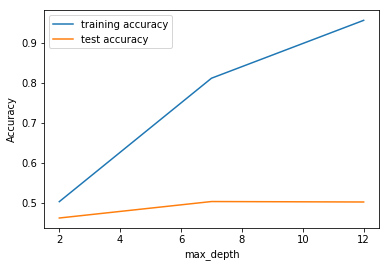

In [69]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [70]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(50, 500, 100)}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=4)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': range(50, 500, 100)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [71]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.205241,0.012602,0.005524,0.005856,50,{'n_estimators': 50},0.542373,0.537143,0.445714,0.517241,...,0.513143,0.034928,4,0.664756,0.658571,0.654286,0.644793,0.646220,0.653725,0.007505
1,0.603693,0.031372,0.023715,0.007354,150,{'n_estimators': 150},0.542373,0.548571,0.428571,0.517241,...,0.516571,0.045391,3,0.646132,0.665714,0.664286,0.650499,0.630528,0.651432,0.012924
2,0.969549,0.060261,0.036654,0.007287,250,{'n_estimators': 250},0.559322,0.548571,0.457143,0.511494,...,0.524571,0.037335,1,0.663324,0.652857,0.671429,0.651926,0.647646,0.657436,0.008691
3,1.264306,0.074300,0.041073,0.004267,350,{'n_estimators': 350},0.553672,0.542857,0.457143,0.511494,...,0.521143,0.034907,2,0.664756,0.654286,0.657143,0.653352,0.641940,0.654295,0.007363
4,1.619505,0.047510,0.060606,0.006094,450,{'n_estimators': 450},0.536723,0.537143,0.428571,0.511494,...,0.513143,0.044212,4,0.651862,0.647143,0.667143,0.647646,0.646220,0.652003,0.007814


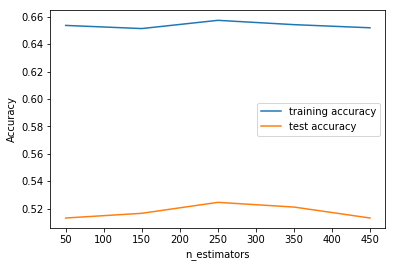

In [72]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [73]:
# GridSearchCV to find optimal max_features
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_features': [7,12,17]}

# instantiate the model
rf = RandomForestClassifier(max_depth=4)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_features': [7, 12, 17]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='accuracy',
       verbose=0)

In [74]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.042253,0.003764,0.003401,0.00120,7,{'max_features': 7},0.508475,0.502857,0.411429,0.551724,...,0.505143,0.051213,1,0.653295,0.607143,0.657143,0.639087,0.594864,0.630306,0.024974
1,0.050251,0.003662,0.001600,0.00196,12,{'max_features': 12},0.474576,0.531429,0.428571,0.528736,...,0.496000,0.039447,3,0.628940,0.632857,0.637143,0.613409,0.617689,0.626008,0.009027
2,0.057272,0.008513,0.000000,0.00000,17,{'max_features': 17},0.508475,0.508571,0.451429,0.505747,...,0.499429,0.024747,2,0.637536,0.612857,0.650000,0.644793,0.607703,0.630578,0.017117


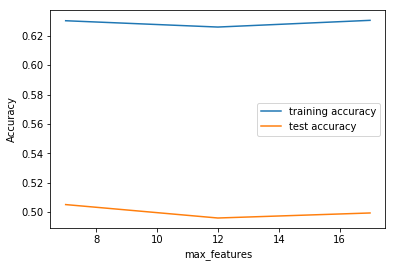

In [75]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [76]:
# GridSearchCV to find optimal min_samples_leaf
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(50, 200, 25)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'min_samples_leaf': range(50, 200, 25)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [77]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.033896,0.002132,0.000807,0.001614,50,{'min_samples_leaf': 50},0.519774,0.531429,0.440000,0.459770,...,0.489143,0.034744,1,0.547278,0.530000,0.561429,0.554922,0.526391,0.544004,0.013710
1,0.043131,0.008265,0.001628,0.001994,75,{'min_samples_leaf': 75},0.451977,0.480000,0.405714,0.494253,...,0.466286,0.034560,3,0.511461,0.527143,0.558571,0.514979,0.486448,0.519720,0.023504
2,0.038743,0.001805,0.001799,0.001833,100,{'min_samples_leaf': 100},0.463277,0.497143,0.428571,0.488506,...,0.468571,0.023871,2,0.504298,0.490000,0.491429,0.509272,0.485021,0.496004,0.009192
3,0.037749,0.004789,0.002403,0.001962,125,{'min_samples_leaf': 125},0.446328,0.474286,0.388571,0.500000,...,0.457143,0.038296,4,0.502865,0.450000,0.491429,0.482168,0.485021,0.482297,0.017646
4,0.033764,0.002421,0.001600,0.001960,150,{'min_samples_leaf': 150},0.440678,0.468571,0.405714,0.431034,...,0.443429,0.024435,6,0.469914,0.447143,0.481429,0.455064,0.453638,0.461437,0.012468


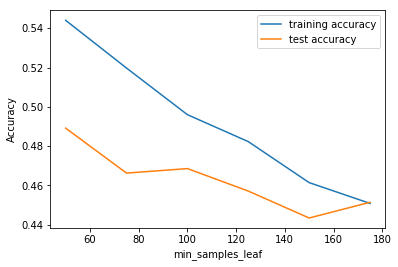

In [78]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [79]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(120, 250, 25)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'min_samples_split': range(120, 250, 25)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [80]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.039076,0.001372,0.002296,0.001884,120,{'min_samples_split': 120},0.519774,0.531429,0.405714,0.465517,...,0.484571,0.045310,3,0.570201,0.564286,0.578571,0.547789,0.554922,0.563154,0.010886
1,0.040906,0.003186,0.002399,0.001959,145,{'min_samples_split': 145},0.491525,0.531429,0.411429,0.482759,...,0.477714,0.038829,4,0.550143,0.555714,0.551429,0.559201,0.567760,0.556850,0.006328
2,0.038023,0.003471,0.002400,0.001960,170,{'min_samples_split': 170},0.502825,0.531429,0.411429,0.482759,...,0.492571,0.044817,2,0.537249,0.540000,0.565714,0.534950,0.539230,0.543429,0.011279
3,0.040836,0.007383,0.003171,0.006343,195,{'min_samples_split': 195},0.485876,0.491429,0.388571,0.488506,...,0.472000,0.042275,5,0.527221,0.525714,0.547143,0.537803,0.534950,0.534566,0.007760
4,0.045510,0.010562,0.001001,0.001553,220,{'min_samples_split': 220},0.519774,0.542857,0.411429,0.477011,...,0.493714,0.046261,1,0.530086,0.511429,0.525714,0.534950,0.543509,0.529138,0.010645


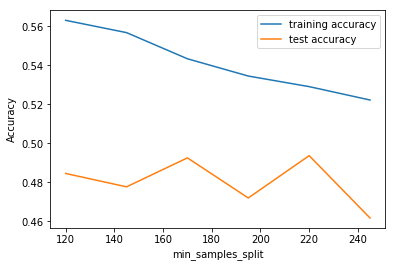

In [81]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

## Grid Search to Find Optimal Hyperparameters

In [82]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [2,15,5],
    'min_samples_leaf': range(50, 200, 25),
    'min_samples_split': range(100, 250, 25),
    'n_estimators': [50, 700, 200], 
    'max_features': [4, 10]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

In [83]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 648 candidates, totalling 1944 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   28.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  9.1min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed: 11.9min
[Parallel(n_jobs=-1)]: Done 1944 out of 1944 | elapsed: 12.6min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': [2, 15, 5], 'min_samples_leaf': range(50, 200, 25), 'min_samples_split': range(100, 250, 25), 'n_estimators': [50, 700, 200], 'max_features': [4, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [84]:
# printing the optimal accuracy score and hyperparameters

print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.504 using {'max_depth': 5, 'max_features': 4, 'min_samples_leaf': 50, 'min_samples_split': 100, 'n_estimators': 50}


In [85]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=5,
                             min_samples_leaf=50, 
                             min_samples_split=100,
                             max_features=10,
                             n_estimators=150)

In [86]:
# fit

rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features=10, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=50, min_samples_split=100,
            min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [87]:
# predict

predictions = rfc.predict(X_test)

In [88]:
# evaluation metrics

from sklearn.metrics import classification_report,confusion_matrix

In [89]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.43      0.57      0.49       108
          1       0.59      0.74      0.66       170
          2       0.39      0.07      0.12        97

avg / total       0.49      0.52      0.47       375



In [90]:
print(confusion_matrix(y_test,predictions))

[[ 62  40   6]
 [ 39 126   5]
 [ 42  48   7]]


In [91]:
from sklearn.ensemble import AdaBoostClassifier


In [92]:
grid_search_best_params_ = {'bootstrap': True,
                             'max_depth' : 5,
                             'min_samples_leaf':50, 
                             'min_samples_split':100,
                             'max_features':10,
                             'n_estimators':150,
                            }


In [93]:
# create model for the best n estimators value

ABC = AdaBoostClassifier(n_estimators=150,base_estimator=rfc)

In [94]:
# fit the model

ABC.fit(X,y)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features=10, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=50, min_samples_split=100,
            min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          learning_rate=1.0, n_estimators=150, random_state=None)

In [95]:
# check prediction on test set

y_pred_abc =  ABC.predict(X_test)

In [96]:
from sklearn.metrics import confusion_matrix

# define function to calculate and print model metrics.
def printMetrics(y_test,y_pred):
    cp = confusion_matrix(y_test,y_pred)
    sensitivity = cp[1,1]/(cp[1,0]+cp[1,1])
    specificity =  cp[0,0]/(cp[0,1]+cp[0,0])
    precision = cp[1,1]/(cp[0,1]+cp[1,1])
    print('Confusion Matrix: \n',cp)
    print("Sensitivity: ", sensitivity)
    print("Specificity: ",specificity)
    #print("AUC Score: ", roc_auc_score(y_test,y_pred)) 
    print("Precision: ",precision)
    #print("f1 Score: ",f1_score(y_test,y_pred))

In [97]:
printMetrics(y_test,y_pred_abc)

Confusion Matrix: 
 [[104   3   1]
 [  1 166   3]
 [  7   8  82]]
Sensitivity:  0.9940119760479041
Specificity:  0.9719626168224299
Precision:  0.9822485207100592


### Predicting on Test file using the final model


In [98]:
ypredict= ABC.predict(test_df)
ypredict[:10]

array([0, 2, 2, 2, 2, 0, 2, 2, 0, 0], dtype=int64)

In [99]:
test_df['target']= ypredict

In [100]:
print(test_df.head(10))

          current_date         current_time  source_name  destination_name  \
0  1475712000000000000  1573347938000000000           21                20   
1  1475712000000000000  1573347956000000000           17                21   
2  1475712000000000000  1573366314000000000          156               127   
3  1475712000000000000  1573369200000000000           83                70   
4  1475712000000000000  1573369209000000000           79                63   
5  1475712000000000000  1573369215000000000           71                16   
6  1475712000000000000  1573369219000000000           16                21   
7  1475712000000000000  1573369225000000000           23                23   
8  1475712000000000000  1573369467000000000           83                21   
9  1475712000000000000  1573369663000000000           71                21   

   train_name  longitude_source  latitude_source  mean_halt_times_source  \
0         471          4.243393        50.866728               39

In [101]:
test_df= test_df.drop(['current_date', 'current_time', 'source_name', 'destination_name',
       'train_name', 'longitude_source', 'latitude_source',
       'mean_halt_times_source', 'longitude_destination',
       'latitude_destination', 'mean_halt_times_destination', 'current_year',
       'current_week', 'current_day', 'is_weekend', 'month', 'date',], axis=1)



In [102]:
test_df['target']=test_df['target'].replace({0:'low', 1: 'medium', 2:'high'})

In [103]:
test_df.head()

,target
0,low
1,high
2,high
3,high
4,high


In [104]:
test= pd.read_csv("C:/Users/nidhi/Desktop/Hitachi_Hackathon/DataSet/Test.csv")
test_df['id_code']=test['id_code']

In [105]:
test_df.to_csv('sample_submission.csv', index=False)